# **Classification**

Problems that need a *quantitative* response (numeric value) are **regression** ; problems that need a *qualitative* response (boolean or category) are **classification**. Many statistical methods can be applied to both types of problems.

**Binary** classification have two output classes. They usually end up being "A" and "not A". Examples are "earthquake" or "no earthquake=noise". **Multiclass** classification refers to one with more than two classes.

Classification here requires that we know the labeled, it is a form of *supervised learning*.

## 1. Classification Algorithms
There are several classifier algorithms, which we will summarize below before practicing.

* **Linear Discriminant Analysis (LDA)**: The LDA optimiziation methods produces an optimal dimensionality reductions to a decision line for classificaiton. It is based on variance reduction and has analogy to a PCA coordinate system.

* **Stochastic Gradient Descent (SGD)**:

* **Naive Bayes (NB)**: Simple algorithm that requires little hyper-parameters, provides interpretable results. The algorithm computes conditional probabilities and uses the product as a decision rule to maximize the probability in each class.

* **K-nearest neighbors (KNN)**: Choose *K* as the numbers of nearest data points to consider. Gather each data sample and the K nearest ones, assign the class that is most represented in that group (the mode of the K labels).

* **Support Vector Machine (SVM)**: Finds the hyperplanes that separate the classes with sufficient margins. The hyperplanes can be linear and more complex (kernels SVM such as radial basis function and polynomial kernels). SVM was very popular for limited training data.

* **Random Forest (RF)**: Decision trees are common for prediction pipelines. *Decision tree learning* is a method to create a predictive model of trees based on the data. More on that this monday.

 Some classifiers can handle multi class natively (Stochastic Gradient Descent - SGD; Random Forest classification;  Naive Bayes). Others are strictly binary classifiers (Logistic Regression, Support Vector Machine classifier - SVM). 


 We can compare them all in one [exercise](!https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).


In [1]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

# basic tools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

# classifiers from sklearns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


### 1.1 Synthetic Data
First, we start making new data using the scikitlearn tools.

In [2]:
# make a data set
X, y = make_moons(noise=0.3, random_state=0)

Plot the data

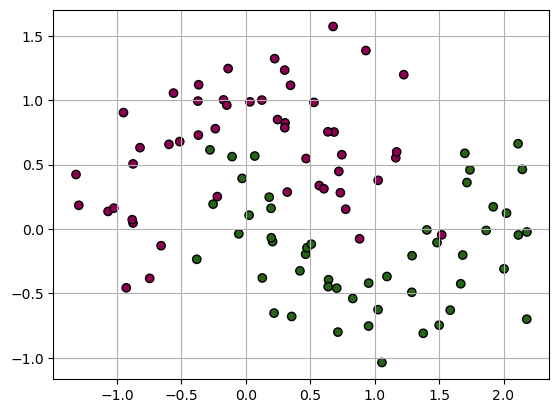

In [3]:
plt.scatter(X[:,0],X[:,1],c=y, cmap='PiYG', edgecolors="k");plt.grid(True)

We will start with the foundamental LDA.

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# define ML
clf = LinearDiscriminantAnalysis() 

# normalize data.
X = StandardScaler().fit_transform(X)

# split data between train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit the model.
clf.fit(X_train, y_train)

# calculate the mean accuracy on the given test data and labels.
score = clf.score(X_test, y_test)
print("The mean accuracy on the given test and labels is %f" %score)

The mean accuracy on the given test and labels is 0.875000


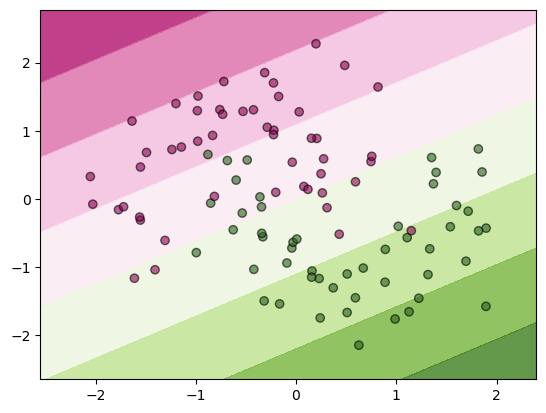

In [5]:

from sklearn.inspection import DecisionBoundaryDisplay
ax = plt.subplot()
# plot the decision boundary as a background
DecisionBoundaryDisplay.from_estimator(clf, X, cmap='PiYG', alpha=0.8, ax=ax, eps=0.5)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='PiYG', alpha=0.6, edgecolors="k")


The results shows a not-too bad classification, but a low confidence.

Let's try a different classifer: KNN



The mean accuracy on the given test and labels is 0.975000


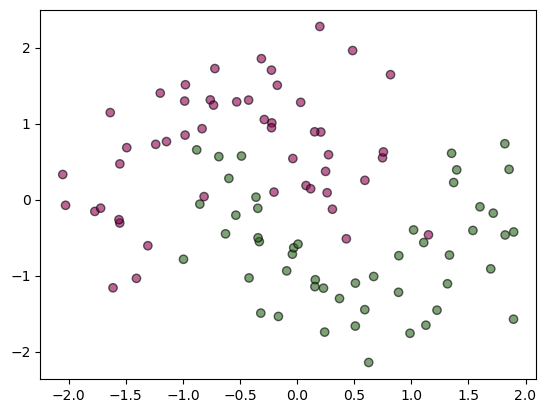

In [6]:

# define ML
K = 5
clf= KNeighborsClassifier(K)

# normalize data.
X = StandardScaler().fit_transform(X)

# split data between train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit the model.
clf.fit(X_train, y_train)

# calculate the mean accuracy on the given test data and labels.
score = clf.score(X_test, y_test)
print("The mean accuracy on the given test and labels is %f" %score)

# plot the decision boundary as a background
ax = plt.subplot()
# DecisionBoundaryDisplay.from_estimator(clf, X, cmap='PiYG', alpha=0.8, ax=ax, eps=0.5)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='PiYG', alpha=0.6, edgecolors="k")


Now we will test the effect of **data normalization** before the classification. We will stretch the first axis of the data to see the effects.

In [7]:
# make a data set
X, y = make_moons(noise=0.3, random_state=0)
X[:,0] = 10*X[:,0] 
plt.axis(equal);

The mean accuracy on the given test and labels is 0.975000


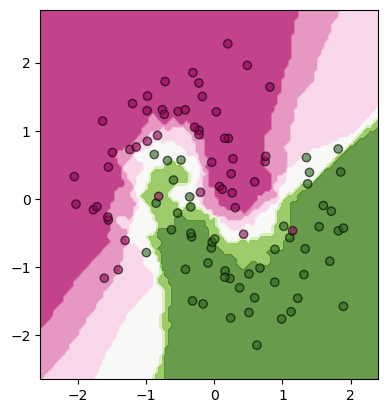

In [17]:

# define ML
K = 5
clf= KNeighborsClassifier(K)

# normalize data.
X = StandardScaler().fit_transform(X)

# split data between train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit the model.
clf.fit(X_train, y_train)

# calculate the mean accuracy on the given test data and labels.
score = clf.score(X_test, y_test)
print("The mean accuracy on the given test and labels is %f" %score)

# plot the decision boundary as a background
ax = plt.subplot()
DecisionBoundaryDisplay.from_estimator(clf, X, cmap='PiYG', alpha=0.8, ax=ax, eps=0.5)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='PiYG', alpha=0.6, edgecolors="k"); ax.set_aspect('equal')


This drastically reduces the performance.

The mean accuracy on the given test and labels is 0.975000


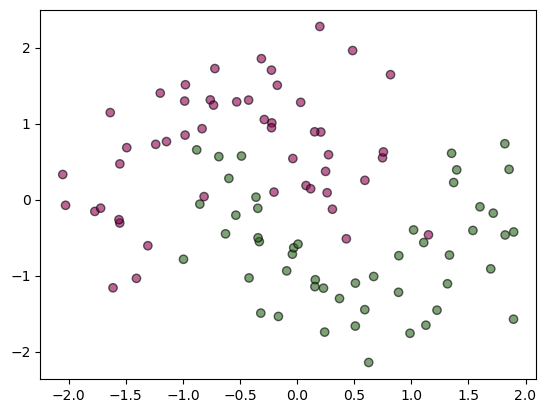

In [9]:

# define ML
K = 5
clf= KNeighborsClassifier(K)

# normalize data.
X = StandardScaler().fit_transform(X)

# split data between train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit the model.
clf.fit(X_train, y_train)

# calculate the mean accuracy on the given test data and labels.
score = clf.score(X_test, y_test)
print("The mean accuracy on the given test and labels is %f" %score)

# plot the decision boundary as a background
ax = plt.subplot()
# DecisionBoundaryDisplay.from_estimator(clf, X, cmap='PiYG', alpha=0.8, ax=ax, eps=0.5)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='PiYG', alpha=0.6, edgecolors="k")


## 2. Classifier Performance Metrics

In a binary classifier, we label one of the two classes as *positive*, the other class is negative. Let's consider *N* data samples.

| True Class \ predicted Class     | Positive            | Negative           | **Total** |
|  -------------  |  -----------------  |  --------------- | ----- |
| Positive        | True Positive   | False Negative | p     |
| Negative        | False Positive  | True Negative  | n     |
| **Total**       | p'                  | n'                 | N     |

In this example, there were originally a total of $p=FN+TP$ positive labels and $n=FP+TN$ negative levels. We ended up with $p'=TP+FP$ predicted as positive and $n'=FN+TN$ predicted as negative.

**True positive TP**: the number of data predicted as *positive* that were originally *positive*. 

**True negative TN**: the number of data predicted as *negative* that were originally *negative*.

**False positive FP**: the number of data predicted as *positive* but that were originally *negative*.

**False negative FN**: the number of data predicted as *negative* that were originally *positive*. 

**Confusion matrix:**
Count the instances that an element of class *A* is classified in class *B*. A 2-class confusion matrix is:

$ C = \begin{array}{|cc|} TP & FN \\ FP  & TN \end{array}$

The confusion matrix can be extended for a multi-class classification and the matrix is KxK instead of 2x2. The best confusion matrix is one that is close to identity, with little off diagnoal terms.

**Other model performance metics**
Model peformance can be assessed wih the following:
* **error** : the fraction of the data that was misclassified 

    $err = \frac{FP+FN}{N}$  -> 0
* **accuracy**: the fraction of the data that was correctly classified: 
    
    $acc = \frac{TP+TN}{N} = 1 - err $ --> 1

* **TP-rate**: the ratio of samples predicted in the *positive* class that are correctly classified:

    $TPR = \frac{TP}{TP+FN}$ --> 1
    
    This ratio is also the **recall** value or **sensitivity**.

* **TN-rate**: the ratio of samples predicted in the *negative* class that are correctly classified:

    $TNR = \frac{TN}{TN+FP}$ --> 1
    
    This ratio is also the **specificity**.

* **Precision**: the ratio of samples predicted in the *positive* class that were indeed *positive* to the total number of samples predicted as *positive*.

    $pr = \frac{TP}{TP+FP}$ --> 1
 
* **F1 score**:

    $F_1 = \frac{2}{(1/ precision + 1/recall)} = \frac{TP}{TP + (FN+FP)/2} $ --> 1.

    
The harmonic mean of the F1 scores gives more weight to low values. F1 score is thus high if both recall and precision are high.

Let's print these measures from our classification using scikit-learn

In [10]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score 

# Fit the model.
y_test_pred=clf.predict(X_test)

print("confusion matrix")
print(confusion_matrix(y_test,y_test_pred))
print("precison, recall")
print(precision_score(y_test,y_test_pred),recall_score(y_test,y_test_pred))
print("F1 score")
print(f1_score(y_test,y_test_pred))

confusion matrix
[[18  1]
 [ 0 21]]
precison, recall
0.9545454545454546 1.0
F1 score
0.9767441860465117


A complete well-formatted report of the performance can be called using the function ``classification_report``:

In [11]:
from sklearn.metrics import classification_report
print(f"Classification report for classifier {clf}:\n"
      f"{classification_report(y_test, y_test_pred)}\n")

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40




**Precision and recall trade off**: increasing precision reduces recall.

$precision = \frac{TP}{TP+FP}$ 

$recall = \frac{TP}{TP+FN}$ 


The classifier uses a *threshold* value to decide whether a data belongs to a class. Increasing the threhold gives higher precision score, decreasing the thresholds gives higher recall scores. Let's look at the various score values.

**Receiver Operating Characteristics ROC** 

It plots the true positive rate against the false positive rate.
The ROC curve is visual, but we can quantify the classifier performance using the *area under the curve* (aka AUC). Ideally, AUC is 1.

![ROC curve](roc-curve-v2-glassbox.png)

[source: https://commons.wikimedia.org/wiki/File:Roc-draft-xkcd-style.svg]

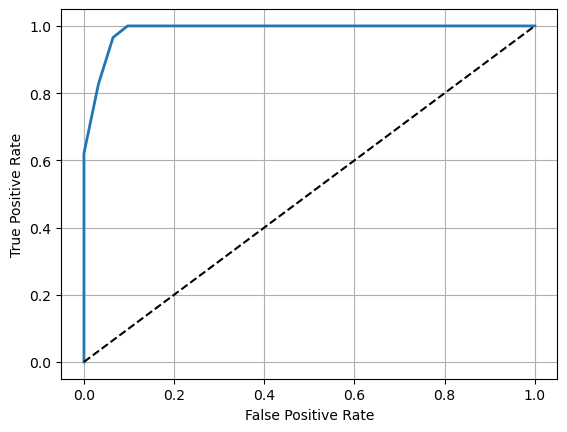

In [12]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score


y_scores = clf.predict_proba(X_train)
fpr,tpr,thresholds=roc_curve(y_train,y_scores[:,1])
plt.plot(fpr,tpr,linewidth=2);plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'k--')

We now explore the different classifiers packaged in scikit learn. We can systematically test their performance and save the precision, recall, 

In [13]:
# define models
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]



## 3. Model exploration

* Explore How each of these models perform on the synthetic data. 

* Save in an array the precision, recall, F1 score values.

* Find the best performing model

In [14]:
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
pre=np.zeros(len(classifiers))
rec=np.zeros(len(classifiers))
f1=np.zeros(len(classifiers))
for ii,iclass in enumerate(classifiers):
    iclass.fit(X_train, y_train)
    y_test_pred=iclass.predict(X_test)
    pre[ii] =precision_score(y_test,y_test_pred)
    rec[ii] =recall_score(y_test,y_test_pred)
    f1[ii] =f1_score(y_test,y_test_pred)

df=pd.DataFrame({'CLF name':names,'precision':pre,'recall':rec,'f1_score':f1})
print(df)


            CLF name  precision    recall  f1_score
0  Nearest Neighbors   0.954545  1.000000  0.976744
1         Linear SVM   0.900000  0.857143  0.878049
2            RBF SVM   0.954545  1.000000  0.976744
3   Gaussian Process   0.954545  1.000000  0.976744
4      Decision Tree   0.913043  1.000000  0.954545
5      Random Forest   0.947368  0.857143  0.900000
6           AdaBoost   0.950000  0.904762  0.926829
7        Naive Bayes   0.900000  0.857143  0.878049
8                QDA   0.857143  0.857143  0.857143
